# Trabalho 2 - Fundamentos de Inteligência Artificial

Membros: Anna Luisa Antony Afonso, Beatriz Quaresma Athaide, Elaine de Castro Freire, Manuela Figueira Batista, Raissa Clara Teixeira Brasil e Ruthelene Rodrigues Farias.

O código apresentado realiza uma série de etapas preparatórias essenciais para um projeto de *machine learning* ou análise de dados, focando na classificação de doenças cardíacas usando redes neurais.


# 1 - Inicialização e Carregamento de Dados

Os blocos a seguir de código importam e exibem as versões das principais bibliotecas utilizadas. Esta é uma prática recomendada para garantir a reprodutibilidade do ambiente de execução e evitar problemas de compatibilidade entre as diferentes versões.

As bibliotecas verificadas incluem:

*   sys: Para informações sobre o ambiente Python.
*   pandas: Para manipulação e análise de dados.
*   numpy: Para operações numéricas e array de alto desempenho.
*   sklearn: Para ferramentas de aprendizado de máquina.
*   matplotlib: Para visualização e plotagem de dados.
*   keras: Para a construção e treinamento de redes neurais.

Em seguida, o código monta o Google Drive no ambiente de execução e importa matplotlib.pyplot e seaborn para criar gráficos e visualizações estatísticas, e pandas.plotting.scatter_matrix para gráficos de dispersão.

Em resumo, o código está configurando o ambiente, verificando as dependências e carregando os dados brutos necessários para iniciar a fase de exploração e pré-processamento de dados para o projeto de *machine learning*.

In [24]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Pandas: 2.2.2
Numpy: 2.0.2
Sklearn: 1.6.1
Matplotlib: 3.10.0
Keras: 3.10.0


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

# 2 - Importação do Dataset

Este bloco inicial carrega o dataset em cleveland, confirmando suas dimensões (303 amostras e 14 colunas). A inspeção imediata das linhas revela a presença de valores ausentes codificados como '?', sinalizando a necessidade urgente de limpeza de dados antes de qualquer processamento estatístico ou treinamento de modelo.

Os valores '?' são substituídos e todas as linhas que contêm valores nulos (NaN) são removidas, resultando no DataFrame data com menos amostras (ex: 297 linhas) e garantindo a integridade dos dados. Embora o dataset esteja limpo de inconsistências, o data.dtypes confirma que as colunas ainda são do tipo object, exigindo conversão para o formato numérico na próxima etapa para permitir cálculos.

 A remoção de observações duplicadas no DataFrame data  também ocorre, é utilizado o método drop_duplicates(inplace=True). A função garante que cada paciente seja representado apenas uma vez no conjunto de dados. O resultado é a exibição do novo shape do DataFrame, confirmando se houve a eliminação de linhas redundantes. Este passo é crucial para a integridade dos dados, pois evita que o modelo aprenda de forma enviesada ou superestime a frequência de certos padrões.

O código converte todas as colunas para o tipo numérico (int64 ou float64), passo fundamental para a modelagem de Machine Learning. Após a conversão, o data.describe() gera as estatísticas descritivas, fornecendo um resumo rápido sobre a escala, a média e o desvio padrão de cada característica, sendo crucial para identificar possíveis outliers e planejar o pré-processamento de scaling.

A chamada data.hist() plota um histograma para cada variável, permitindo a análise visual da distribuição de frequência. Esta visualização é essencial para avaliar a simetria dos dados e, mais crucialmente, verificar o balanceamento da classe alvo (target), ou seja, se a proporção de pacientes com e sem doença cardíaca está equilibrada.

O pd.crosstab cruza idade com a variável target para criar um gráfico de barras que mostra a frequência de casos positivos e negativos em cada idade. A visualização permite identificar as faixas etárias com maior prevalência da doença no dataset, oferecendo um insight direto sobre a importância da idade como preditora.

O código calcula e exibe a matriz de correlação de Pearson via um Heatmap. A análise primária foca na correlação entre as características e a variável target (os valores mais próximos de ±1), identificando os preditores mais fortes. Secundariamente, o gráfico ajuda a detectar a multicolinearidade (alta correlação entre preditores).

Ao final, o código calcula e plota a média da frequência cardíaca máxima (thalach) por idade. O gráfico de pontos resultante deve exibir a tendência de queda do thalach conforme a idade avança, o que é um comportamento fisiológico esperado, validando a qualidade e a coerência da variável no contexto do problema de classificação.

In [27]:
path = '/content/drive/MyDrive/Dataset RN/heart.csv'
cleveland = pd.read_csv(path)

In [28]:
print( 'Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1:300])

Shape of DataFrame: (1025, 14)
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
5     58    0   0       100   248    0        0      122      0      1.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
296   67    1   0       120   237    0        1       71      0      1.0   
297   58    1   0       150   270    0        0      111      1      0.8   
298   35    1   1       122   192    0        1      174      0      0.0   
299   52    1   1       120   325    0        1      172      0      0.2   
300   46    0   1       105   204    0        1      172      0      0.0   

     slope  ca  thal  target  
1        0   0     3     

In [29]:
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [30]:
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [31]:
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [32]:
data.drop_duplicates(inplace=True)
print('Shape of DataFrame after removing duplicates: {}'.format(data.shape))

Shape of DataFrame after removing duplicates: (302, 14)


In [33]:
print(data.shape)
print(data.dtypes)

(302, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [34]:
data = data.apply(pd.to_numeric)
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [35]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


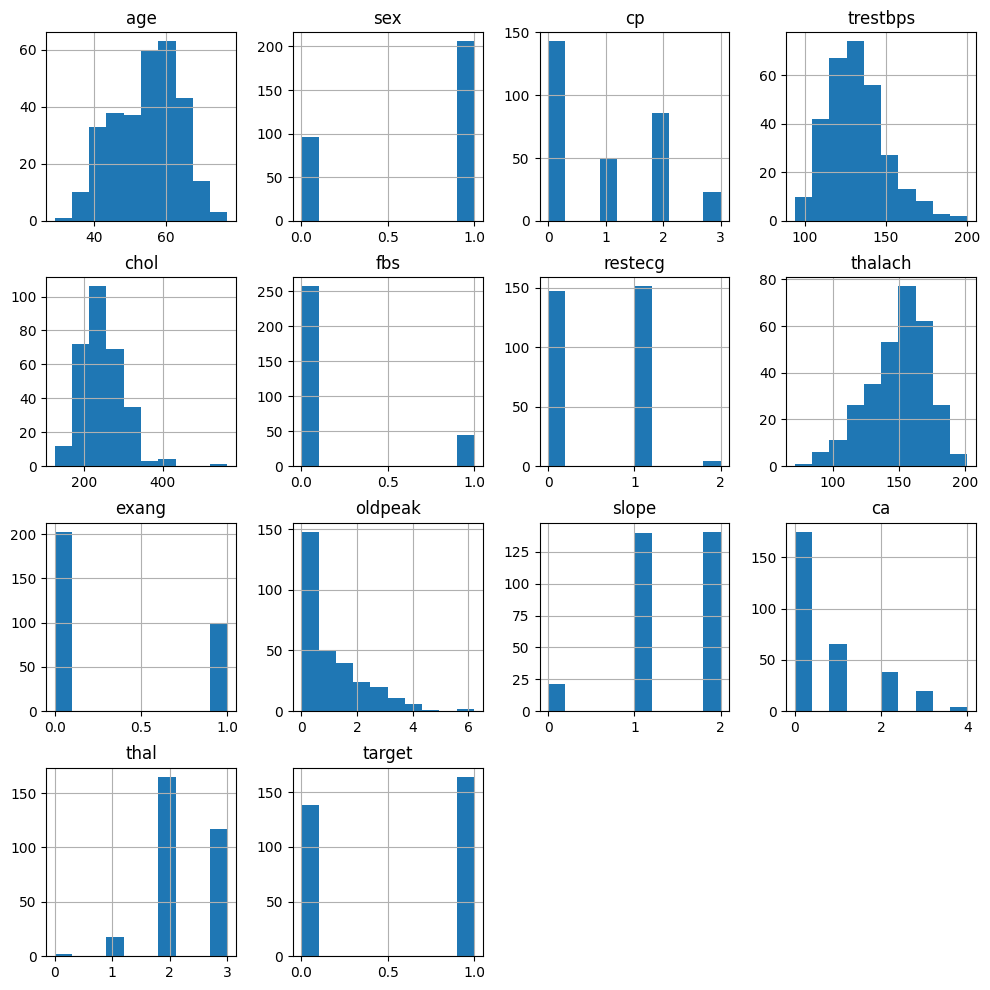

In [36]:
data.hist(figsize = (12, 12))
plt.show()

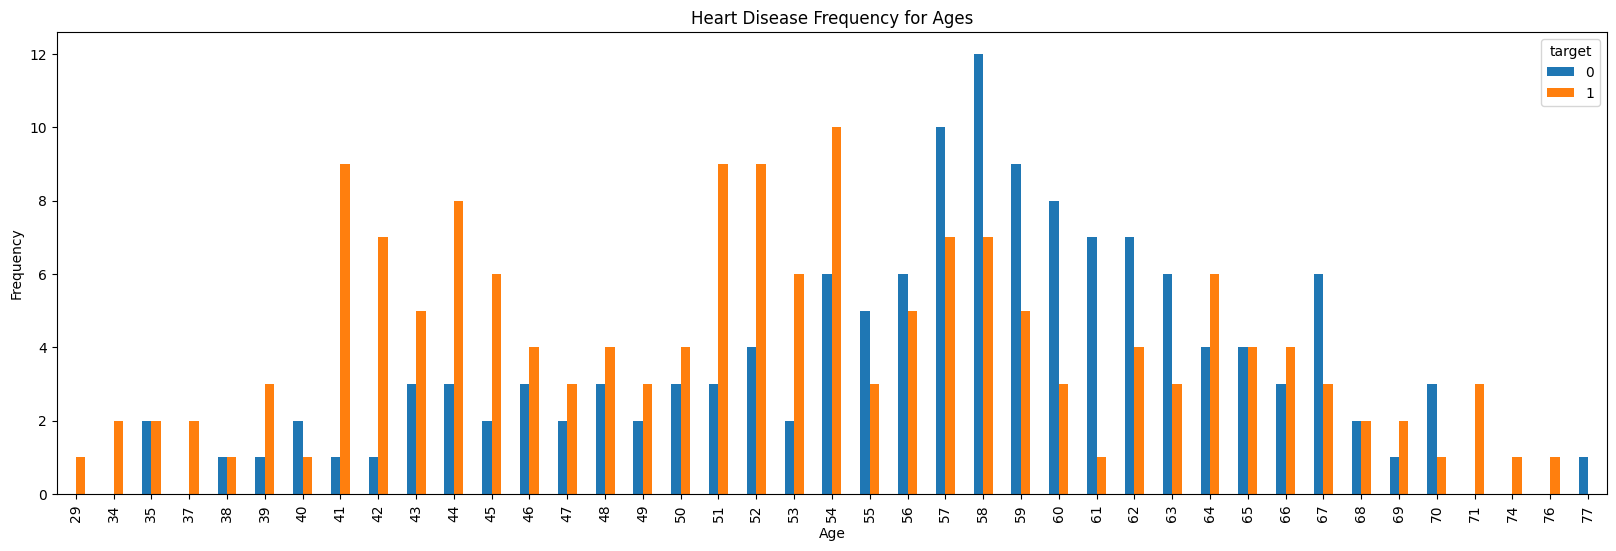

In [37]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

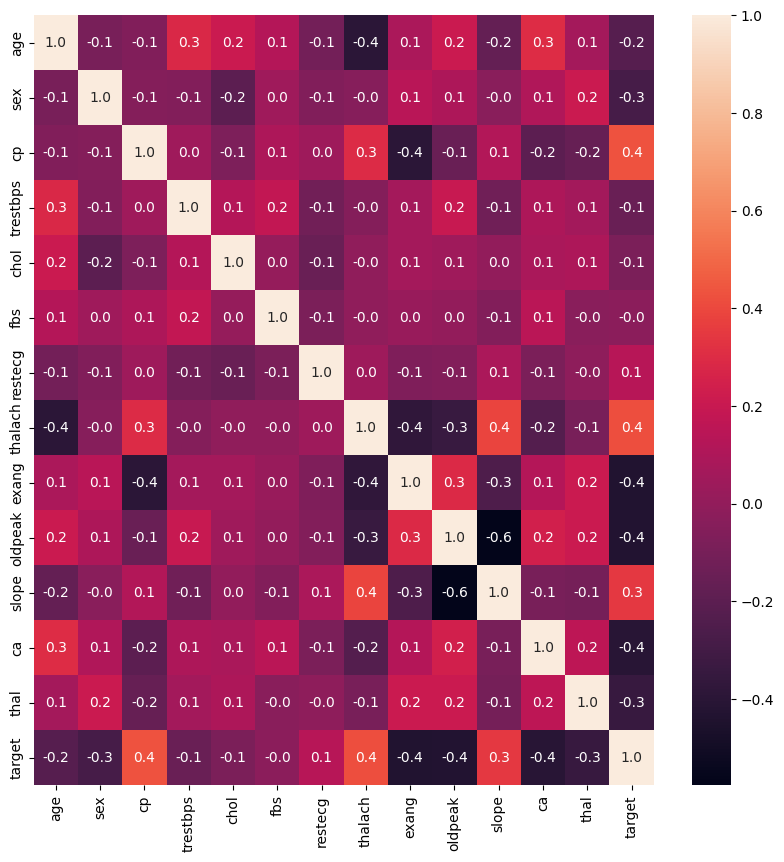

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

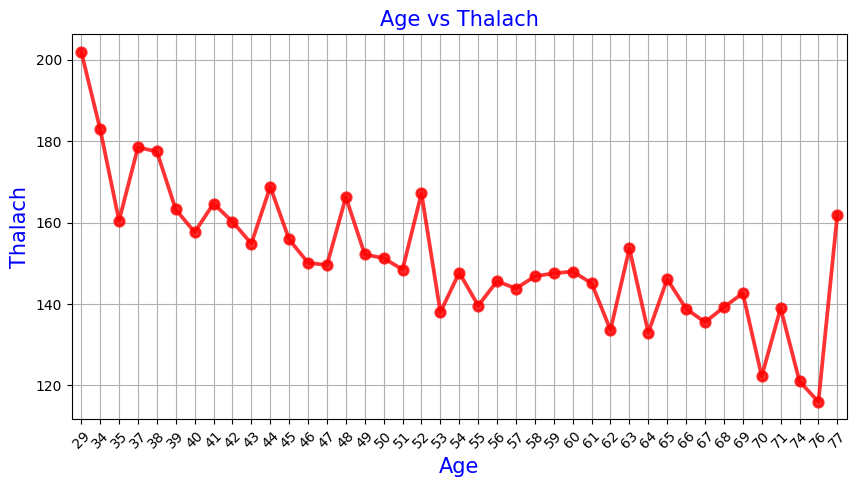

In [39]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])

plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

# 3 - Criação dos Dados de Treinamento

Os blocos a seguir são responsáveis por importar bibliotecas essenciais, separar os dados em *features* (variáveis de entrada) e *target* (variável de saída), e, em seguida, dividir e padronizar (normalizar) esses dados para o treinamento de um modelo de *Machine Learning*.

O bloco realiza a preparação completa dos dados para o treinamento. Primeiro, as características (X) e o alvo (y) são separados. Em seguida, a função train_test_split divide o dataset em conjuntos de treino (80%) e teste (20%), usando stratify=y para garantir que a proporção de classes da variável alvo seja mantida em ambos os conjuntos. Por fim, o StandardScaler é aplicado: ele é ajustado (fit_transform) apenas aos dados de treino (X_train) e, em seguida, aplicado (transform) aos dados de teste (X_test), padronizando as características para média zero e desvio padrão um, o que é crucial para o bom desempenho da Rede Neural. Isso impede o vazamento de informações do conjunto de teste, garantindo que o modelo seja avaliado de forma imparcial.

O comando seguinte exibe o vetor de características da primeira amostra do array original X. Essa visualização rápida serve para confirmar que os dados originais (antes da padronização e divisão) estão corretamente estruturados e prontos. É importante notar que esses valores não estão padronizados, pois o scaling foi aplicado apenas aos subconjuntos X_train e X_test, mantendo a matriz X original intacta.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separação de features e target
X = data.drop(columns=['target']).values
y = data['target'].values

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    random_state=42,
    test_size=0.2
)

# Normalização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
X[0]

array([ 52.,   1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,
         2.,   3.])

# 4 - Treinamento da Rede Neural

O código começa com a Preparação dos Dados de Target, que é essencial para transformar o problema original, que provavelmente era de classificação multiclasse (vários níveis de doença), em um problema de Classificação Binária (Doença Presente ou Ausente). Para isso, são criadas cópias (Y_train_binary e Y_test_binary) das variáveis target originais (y_train e y_test). Em seguida, um mapeamento é aplicado: qualquer valor no target maior que zero (indicando alguma forma ou estágio de doença) é convertido para 1 (Doença Presente/Positivo), enquanto o valor zero (ausência de doença) é mantido. O print inicial serve como uma etapa de verificação de debug para garantir que a binarização ocorreu corretamente.

A seguir, a função create_binary_model define a Arquitetura da Rede Neural Artificial (RNA) usando a API Sequencial do Keras. O modelo é composto por uma sequência de camadas densamente conectadas (Dense). A camada de entrada recebe 13 features (input_dim=13) e tem 16 neurônios. Seguem-se mais duas camadas ocultas com 12 e 8 neurônios, respectivamente. Todas as camadas ocultas usam a função de ativação ReLU para introduzir não-linearidade no modelo, permitindo que ele aprenda padrões complexos.

Para combater o overfitting, técnicas de regularização são aplicadas. O Dropout (com uma taxa de $0.4$, ou $40\%$ ) é aplicado após cada camada oculta, desligando aleatoriamente neurônios durante o treinamento para forçar a rede a não depender de caminhos específicos. Além disso, a Regularização L2 (Ridge, com $\lambda=0.005$) é utilizada nas camadas densas, penalizando pesos grandes e suavizando o modelo. A camada de saída é uma única unidade com a função de ativação Sigmoid, que comprime o resultado final em uma probabilidade entre 0 e 1, ideal para a classificação binária.

A etapa de Compilação configura o processo de aprendizado: o otimizador Adam é escolhido (com uma taxa de aprendizado de $0.001$), sendo uma escolha robusta e eficiente para otimização do gradiente. A função de perda é definida como *binary_crossentropy*, que é a perda padrão para modelos que preveem probabilidades binárias. A métrica de monitoramento escolhida é a *accuracy* (acurácia)

O Treinamento do modelo (*binary_model.fit*) é executado no conjunto de treinamento (X_train, Y_train_binary) por um máximo de $100$ épocas, com um tamanho de batch de $16$. O desempenho é monitorado no conjunto de validação (X_test, Y_test_binary). Crucialmente, é usado um callback de *Early Stopping* com patience=10. Esta técnica monitora a val_loss (perda no conjunto de validação) e interrompe o treinamento se ela não melhorar após $10$ épocas consecutivas, restaurando os pesos da época que apresentou o melhor desempenho. Isso garante que o treinamento pare no ponto ideal, evitando que o modelo comece a se especializar demais nos dados de treino (overfitting).

Finalmente, a seção de Visualização utiliza a biblioteca matplotlib para plotar o histórico de treinamento armazenado. São gerados dois gráficos: um para a Acurácia (Treinamento vs. Validação) e outro para a Perda (Treinamento vs. Validação). Estes gráficos são essenciais para diagnosticar visualmente se o modelo está aprendendo de forma eficaz (perda caindo, acurácia subindo) e se está generalizando bem para novos dados (linhas de treinamento e validação permanecendo próximas).

In [42]:
# Preparação dos Dados de Target para Classificação Binária

# Assume-se que 'y_train' e 'y_test' já estão carregados.
# Cria cópias dos dados originais para a classificação binária
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

# Converte o target para binário: 0 (não doença) e 1 (doença/positivo)
# Onde y > 0 significa que há alguma doença/condição,
# e é mapeado para '1' (doente)
Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

# Exemplo de verificação dos dados binários (para fins de debug)
print("Primeiros 20 valores de Y_train_binary após a conversão:")
print(Y_train_binary[:20])

Primeiros 20 valores de Y_train_binary após a conversão:
[1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1]


In [48]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import regularizers
from keras.optimizers import Adam
from keras.layers import Input

def create_binary_model():

    model = Sequential()

    model.add(Input(shape=(13,)))

    # Camada Oculta 1 (ReLU)
    model.add(Dense(16, kernel_initializer='normal',
                    kernel_regularizer=regularizers.l2(0.005), activation='relu'))
    model.add(Dropout(0.4))

    # Camada Oculta 2 (ReLU)
    model.add(Dense(12, kernel_initializer='normal',
                    kernel_regularizer=regularizers.l2(0.005), activation='relu'))
    model.add(Dropout(0.4))

    # Camada Oculta 3 (ReLU) - Nova camada adicionada
    model.add(Dense(8, kernel_initializer='normal',
                    kernel_regularizer=regularizers.l2(0.005), activation='relu'))
    model.add(Dropout(0.4))

    # Camada de Saída (Sigmoid)
    model.add(Dense(1, activation='sigmoid'))

    # Compila o modelo
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Cria o modelo
binary_model = create_binary_model()

print("Resumo do Modelo com 3 Camadas Ocultas (ReLU) e Saída Sigmoid")
print(binary_model.summary())

Resumo do Modelo com 3 Camadas Ocultas (ReLU) e Saída Sigmoid


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

None


In [44]:
from keras.callbacks import EarlyStopping

# Early Stopping com patience menor para parar antes do overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

history = binary_model.fit(
    X_train, Y_train_binary,
    validation_data=(X_test, Y_test_binary),
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5097 - loss: 0.6989 - val_accuracy: 0.5410 - val_loss: 0.6972
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6098 - loss: 0.6968 - val_accuracy: 0.5410 - val_loss: 0.6955
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5088 - loss: 0.6956 - val_accuracy: 0.5410 - val_loss: 0.6945
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5688 - loss: 0.6940 - val_accuracy: 0.5410 - val_loss: 0.6935
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5685 - loss: 0.6929 - val_accuracy: 0.5410 - val_loss: 0.6929
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5455 - loss: 0.6928 - val_accuracy: 0.5410 - val_loss: 0.6922
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5737 - loss: 0.6917 - val_accuracy: 0.5410 - val_loss: 0.6908
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6445 - loss: 0.6887 - val_accuracy: 0.7213 - 

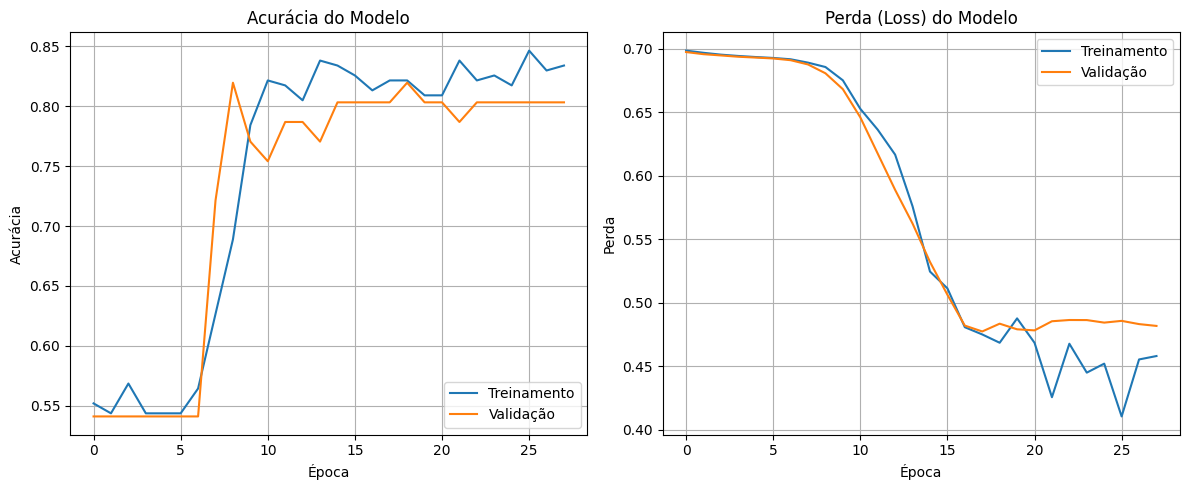

In [45]:
plt.figure(figsize=(12, 5))

# Gráfico de Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(loc='lower right')
plt.grid(True)

# Gráfico de Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda (Loss) do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5 - Avaliação Final do Modelo

Este bloco executa a avaliação final do modelo binário usando o conjunto de teste. O código gera as previsões (binary_pred) aplicando uma função round (arredondamento) na saída sigmoide para converter as probabilidades em classes binárias (0 ou 1). Em seguida, ele imprime a acurácia geral e o Relatório de Classificação, que fornece métricas detalhadas como Precisão, Recall e F1-Score para cada classe. Por fim, ele calcula a Matriz de Confusão e a visualiza como um heatmap usando Seaborn, permitindo uma análise clara de onde o modelo está acertando e errando na classificação.

A métrica Recall, também conhecida como Sensibilidade ou Taxa de Verdadeiros Positivos (True Positive Rate - TPR), é uma medida crucial na avaliação de modelos de classificação, especialmente em cenários onde a identificação correta de casos positivos é de extrema importância, como no diagnóstico médico de doenças raras ou na detecção de fraudes. O Recall mede a proporção de casos positivos reais que foram corretamente identificados pelo modelo. Em termos simples, ele responde à pergunta: "De todas as vezes em que a doença estava realmente presente, quantas vezes o modelo conseguiu detectá-la?".

Em relação ao tema do trabalho, um Recall alto é vital. Um Falso Negativo (FN) significa que o modelo previu que um paciente está 'Saudável', quando na verdade ele está 'Doente'. Um alto Recall minimiza esses Falsos Negativos, o que é fundamental, pois perder um diagnóstico positivo pode ter consequências graves para a saúde do paciente. Por outro lado, o Recall não se preocupa com os Falsos Positivos, por isso ele é frequentemente analisado em conjunto com a métrica Precisão.

A Matriz de Confusão é uma ferramenta de desempenho para algoritmos de classificação, especialmente em problemas binários. É uma tabela que descreve o desempenho de um modelo de classificação em um conjunto de dados de teste para o qual os valores verdadeiros são conhecidos. A matriz compara as previsões do modelo com a verdade real dos dados.

A matriz é composta por quatro valores essenciais:

- Verdadeiros Positivos (VP): O modelo previu 'Positivo' (Doente) corretamente.

- Verdadeiros Negativos (VN): O modelo previu 'Negativo' (Saudável) corretamente.

- Falsos Positivos (FP) - Erro Tipo I: O modelo previu 'Positivo' (Doente), mas o real era 'Negativo' (Saudável).

- Falsos Negativos (FN) - Erro Tipo II: O modelo previu 'Negativo' (Saudável), mas o real era 'Positivo' (Doente).

Esta visualização é fundamental para entender a natureza dos erros do modelo e calcular métricas mais informativas, como Precisão e Recall, que são cruciais em contextos médicos onde um Falso Negativo (deixar de diagnosticar a doença) pode ser mais crítico que um Falso Positivo.



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Relatório de Classificação:
Acurácia: 80.33%


              precision    recall  f1-score   support

Saudável (0)       0.81      0.75      0.78        28
  Doente (1)       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



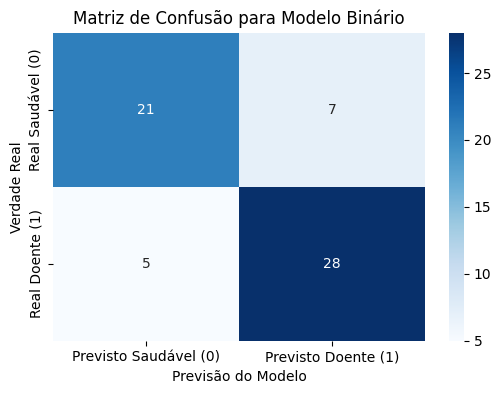

In [46]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification report using predictions for binary model
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Relatório de Classificação:')
print(f"Acurácia: {accuracy_score(Y_test_binary, binary_pred) * 100:.2f}%")
print('\n')

print(classification_report(Y_test_binary, binary_pred, target_names=['Saudável (0)', 'Doente (1)']))

# Calculate and display Confusion Matrix
cm = confusion_matrix(Y_test_binary, binary_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto Saudável (0)', 'Previsto Doente (1)'],
            yticklabels=['Real Saudável (0)', 'Real Doente (1)'])
plt.xlabel('Previsão do Modelo')
plt.ylabel('Verdade Real')
plt.title('Matriz de Confusão para Modelo Binário')
plt.show()

# 6 - Conclusão sobre a eficácia do modelo e a importância da normalização dos dados

A classificação binária é um pilar essencial no campo da aprendizagem de máquina aplicada à medicina, particularmente no diagnóstico e prognóstico de doenças cardíacas.

A eficácia desses modelos reside na sua capacidade de identificar padrões complexos dentro de dados de saúde. A eficácia final do modelo de classificação binária é determinada pela análise das métricas de teste (Acurácia, Precisão, *Recall* e F1-Score) e pela Matriz de Confusão. Um bom modelo apresentará uma alta Acurácia e, mais importante em problemas médicos, um alto Recall para a classe 'Doente' (garantindo que poucos Falsos Negativos ocorram). A comparação das curvas de perda e acurácia entre os modelos base e o modelo regularizado (L2 e Dropout) é crucial: se o modelo otimizado mostrar uma menor diferença entre o desempenho de treino e teste, ele é considerado mais robusto e eficaz na generalização para novos pacientes.

A normalização (ou padronização) dos dados é de importância crítica para o sucesso das Redes Neurais, para que um modelo binário alcance sua máxima eficiência. A padronização dos dados com o StandardScaler garante que todas as características contribuam igualmente para o cálculo do loss (perda), pois coloca todas as variáveis em uma escala comparável (média $\approx 0$, desvio padrão $\approx 1$). Sem a normalização, características com valores muito grandes (como a idade em anos ou o colesterol) poderiam dominar as atualizações de peso durante o treinamento via *gradient descent*, levando a um processo de aprendizado lento, instável e, frequentemente, a uma convergência para resultados subótimos ou a um modelo que não generaliza bem.

Em resumo, a combinação de um modelo binário bem escolhido e a aplicação rigorosa da normalização dos dados transforma o aprendizado de máquina em uma ferramenta poderosa e confiável para o auxílio diagnóstico de doenças cardíacas, otimizando tanto a precisão das previsões quanto a segurança das decisões médicas.